# Predict House Prices

Steps –


1.   Import libraries and read the dataset.
2.   Explore Data Analysis. Find out how one variable related to other and distributions of data.
State your insights.
3.   Build a linear regression model to predict the house prices
4.   Try to find out important features or create new features to improve the performance for your model.
5.   Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.




# Importing Libraries and Data

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
%matplotlib inline 
import math
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [0]:
df=pd.read_csv('kc_house_data.csv')

# EDA

In [4]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


On looking at the Descriptive analysis of the Data

1.  No. of bedrooms feature has a mean of 3 and max of 33. This might be an outlier or an actual data. 
2.   Waterfront is catergorical data



In [7]:
#finding the null values if any
df.isnull().sum().sort_values(ascending = False)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

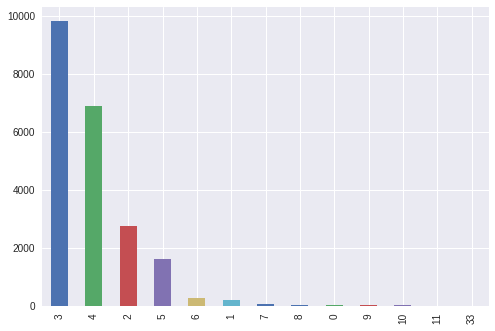

In [8]:
#Number of bedrooms will definitely have an impact on the price
#On looking at the graph, it looks like the houses with 3 Bedrooms have more selling price
df['bedrooms'].value_counts().plot(kind='bar')

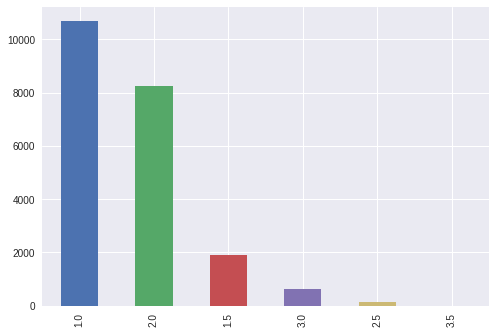

In [9]:
#Number of floors will also have an impact on the price
#On looking at the graph, it looks like the houses with 1 and 2 floors have more selling price
df['floors'].value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


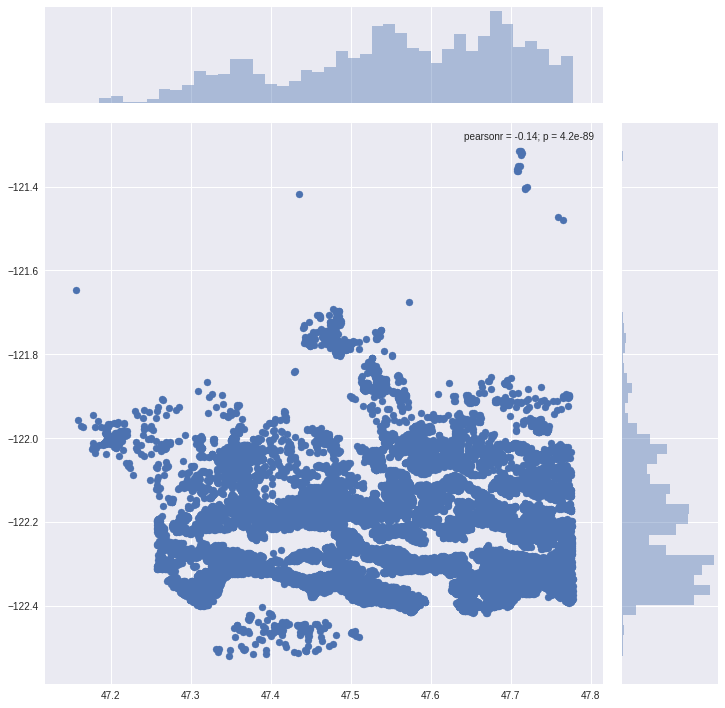

In [10]:

sns.jointplot(x=df.lat.values, y=df.long.values, size =10)

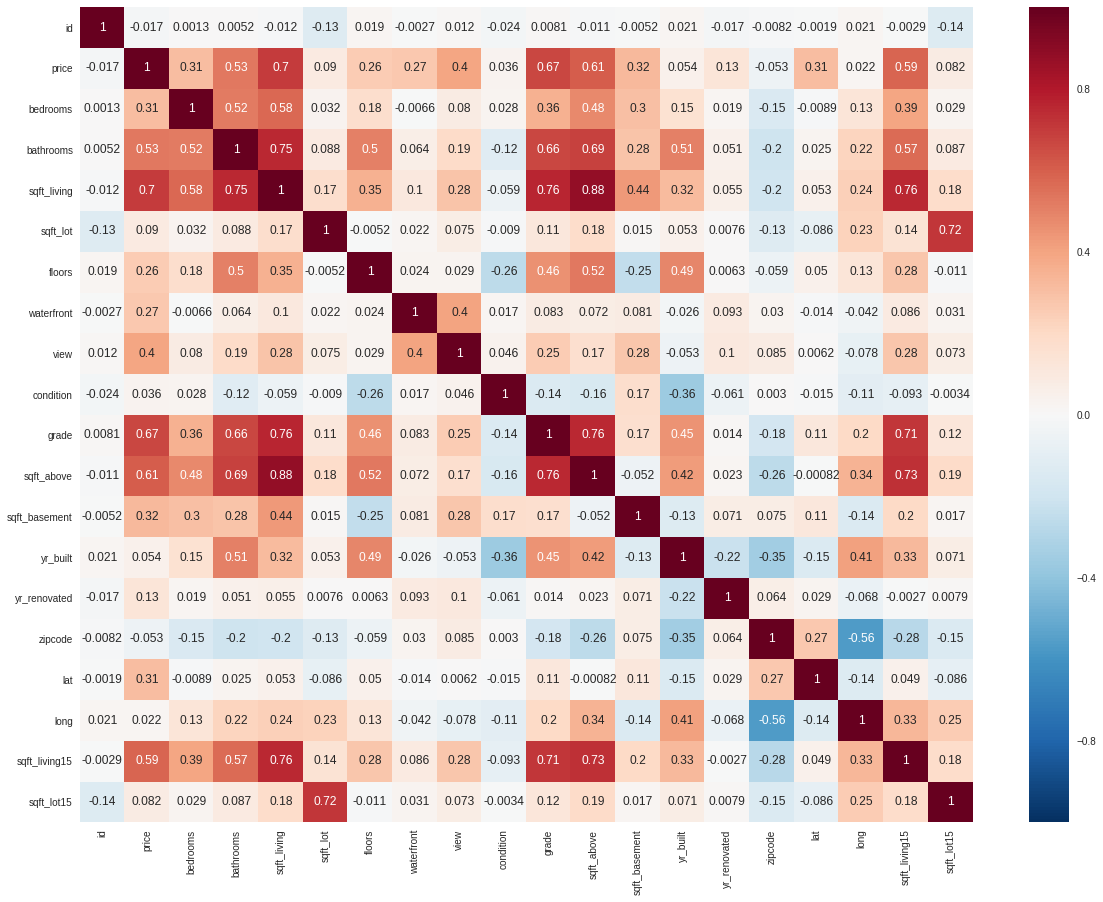

In [11]:
#Findaing the Coorelation Matix using Heatmap
plt.figure(figsize=(20, 15))

park_corr = df.corr()
sns.heatmap(park_corr, 
            xticklabels = park_corr.columns.values,
            yticklabels = park_corr.columns.values,
            annot = True);

Following features have significantly higher correlation with the price of th house
sqft_living      
grade            
sqft_above      
sqft_living15    
bathrooms      

In [12]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'Price')

Text(0.5, 0, 'No. of Bedrooms')

Text(0.5, 0, 'Condition')

Text(0.5, 0, 'Living Area')

Text(0, 0.5, 'Price')

Text(0.5, 0, 'Grade')

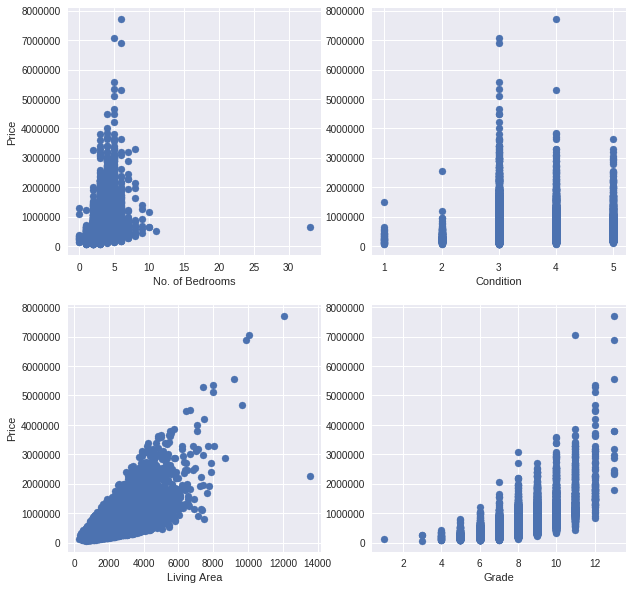

In [13]:
plt.figure(figsize=(10, 10))  
plt.subplot(2, 2, 1)
plt.scatter(df.bedrooms.values, df.price.values)
plt.ylabel('Price')
plt.xlabel('No. of Bedrooms')
plt.subplot(2, 2, 2)
plt.scatter(df.condition.values, df.price.values)
plt.xlabel('Condition')
plt.subplot(2, 2, 3)
plt.scatter(df.sqft_living.values, df.price.values)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.subplot(2, 2, 4)
plt.scatter(df.grade.values, df.price.values)
plt.xlabel('Grade')
plt.show()

# Model Building

In [0]:
lr=LinearRegression()

In [0]:
X=df.drop(['id','price','date'],axis=1)
Y=df[['price']]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [31]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
lr.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr.score(X_train_std,Y_train)

0.7037209052270905

In [34]:
lr.score(X_test_std,Y_test)

0.6858691420603065

In [0]:
Y_pred = lr.predict(X_test_std)

In [36]:
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Root Mean square error:  232850.3620845638


# Feature Selection and Tuning Using PCA and EDA

In [37]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [0]:
#id Column is not required to build the model so we will remove it
#waterfront is a binary categorical data
#Zipcode is a mutiple caterogical data - if we can group this smaller category, this feature might be useful
#sale date can be converted into simpler category, like before 2014 and after 2014
#year build and year renovated have minimal correlation and can be neglected 

In [0]:
i=df[df['date'].str.match('2014')].index
j=df[df['date'].str.match('2015')].index

In [0]:
df.at[i, 'date']=1
df.at[j, 'date']=0

In [41]:
df['date'].value_counts()

1    14633
0     6980
Name: date, dtype: int64

In [0]:
feature = df.drop(['id','zipcode','price'],axis=1)

In [0]:
target=df[['price']]

In [46]:
feature = std.fit_transform(feature)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
X_centered = feature - feature.mean(axis=0)
pca = PCA().fit(X_centered)
pca.explained_variance_
pca.components_

array([5.11968607e+00, 2.06068842e+00, 1.80227828e+00, 1.30253848e+00,
       1.09685863e+00, 1.00519029e+00, 9.74846677e-01, 8.34563584e-01,
       7.76755994e-01, 6.55911489e-01, 5.89852332e-01, 4.98454866e-01,
       3.26562176e-01, 2.85339390e-01, 2.54512383e-01, 2.26056296e-01,
       1.90737521e-01, 4.27597324e-33])

array([[ 1.32592986e-02,  2.51130243e-01,  3.71452093e-01,
         4.03832872e-01,  1.01708662e-01,  2.43180538e-01,
         5.05475243e-02,  1.22634531e-01, -8.84597087e-02,
         3.75783626e-01,  3.98358555e-01,  9.26837170e-02,
         2.47844784e-01,  6.13954130e-03,  8.33577750e-03,
         1.72295266e-01,  3.59730643e-01,  1.08074813e-01],
       [ 3.45903358e-02,  1.70409294e-01,  4.00534113e-02,
         1.83546590e-01, -5.92817286e-02, -2.71186450e-01,
         2.33366559e-01,  3.66993999e-01,  3.09455134e-01,
         3.47670997e-02, -6.55857837e-02,  5.03615588e-01,
        -3.90692992e-01,  1.90648707e-01,  1.59203723e-01,
        -2.97843234e-01,  8.06449596e-02, -6.18080748e-02],
       [-1.71926611e-02, -7.54274885e-02, -1.17522235e-01,
        -4.54815834e-03,  6.28252667e-01, -2.32955827e-01,
         5.59649754e-02,  7.65290163e-02,  1.23601941e-01,
        -8.65602682e-02, -1.71782178e-02,  2.27032968e-02,
        -9.66198474e-02,  7.81956816e-03, -1.84484110e

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28441384, 0.39889124, 0.49901318, 0.57137308, 0.63230685,
       0.68814817, 0.74230381, 0.78866631, 0.83181742, 0.86825526,
       0.90102332, 0.92871398, 0.94685548, 0.96270694, 0.97684586,
       0.98940396, 1.        , 1.        ])

In [0]:
#k=11 explains the 90% variance

In [0]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=1)

In [51]:
pca  = PCA(n_components=11)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
lr_1=LinearRegression()

In [53]:
lr_1.fit(pca.transform(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
lr_1.score(pca.transform(x_train), y_train)

0.6788883330639579

In [55]:
lr_1.score(pca.transform(x_test), y_test)

0.6569164312624418

In [0]:
pred = lr_1.predict(pca.transform(x_test))

In [57]:
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,pred)))

Root Mean square error:  243344.52350871562


In [0]:
#if we choose k=14 which explains 96% variance

In [61]:
pca1  = PCA(n_components=14)
pca1.fit(x_train)
lr_2=LinearRegression()
lr_2.fit(pca.transform(x_train), y_train)
print("\nTraining Score: ", lr_2.score(pca.transform(x_train), y_train))
print("Test Score: ",lr_2.score(pca.transform(x_test), y_test))
pred_1 = lr_2.predict(pca.transform(x_test))
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,pred_1)))

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


Training Score:  0.6788883330639579
Test Score:  0.6569164312624416
Root Mean square error:  243344.5235087157


In [0]:
#PCA did not improve the score of the Linear Regression model much
#So will try simply selecting the feeatures with higher correlation

In [62]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.003576
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [0]:
feature_1 = df.drop(['id','zipcode','price','yr_renovated','yr_built','long','lat','sqft_lot','sqft_lot15','condition'],axis=1)

In [65]:
feature_1 = std.fit_transform(feature_1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(feature_1, target, test_size=0.20, random_state=1)

In [68]:
lr_3=LinearRegression()
lr_3.fit(x_train_1, y_train_1)
print("\nTraining Score: ", lr_3.score(x_train_1, y_train_1))
print("Test Score: ",lr_3.score(x_test_1, y_test_1))
pred_2 = lr_3.predict(x_test_1)
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test_1,pred_2)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


Training Score:  0.5944091979679588
Test Score:  0.6013375392993966
Root Mean square error:  262315.70262835233
